# EDA Student Performance Indicator

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

3) Dataset Information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# 3. Data Checks to Perform

 ---> Check Missing values
 ---> Check Duplicates
 ---> Check data types
 ---> Check the number of unique values of each column
 ---> Check statistics of data set
 ---> Check various categories present in the different categotical column

In [5]:
## Check missing values 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Insights or Observation
There are no missing values

In [6]:
## Check Duplicates
df.duplicated().sum()

0

There are no duplicates values in the dataset

In [7]:
## Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
## Checking the number of uniques values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
## Check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights or Observation

--> From the above description of numerical data,all means are very close to each other- between 66 and 69
--> All the standard deviation are also close- between 14.6- 15.19
--> While there is a minimum of 0 for maths,other are having 17 and 10 value

In [11]:
## Explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [13]:
## Extracting on categorical features from dataset
[feature for feature in df.columns if df[feature].dtype=='O']

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [14]:
## Extracting on Numerical features from dataset
[feature for feature in df.columns if df[feature].dtype!='O']

['math score', 'reading score', 'writing score']

In [15]:
## Segrregate numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype=='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype!='O']

In [16]:
numerical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [17]:
categorical_features

['math score', 'reading score', 'writing score']

In [18]:
## Counts in Categorical Features
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [19]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [21]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [24]:
## Aggregate the total score with mean
df['total_score'] = (df['math score']+df['reading score']+df['writing score'])
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot:xlabel='average', ylabel='Count'>

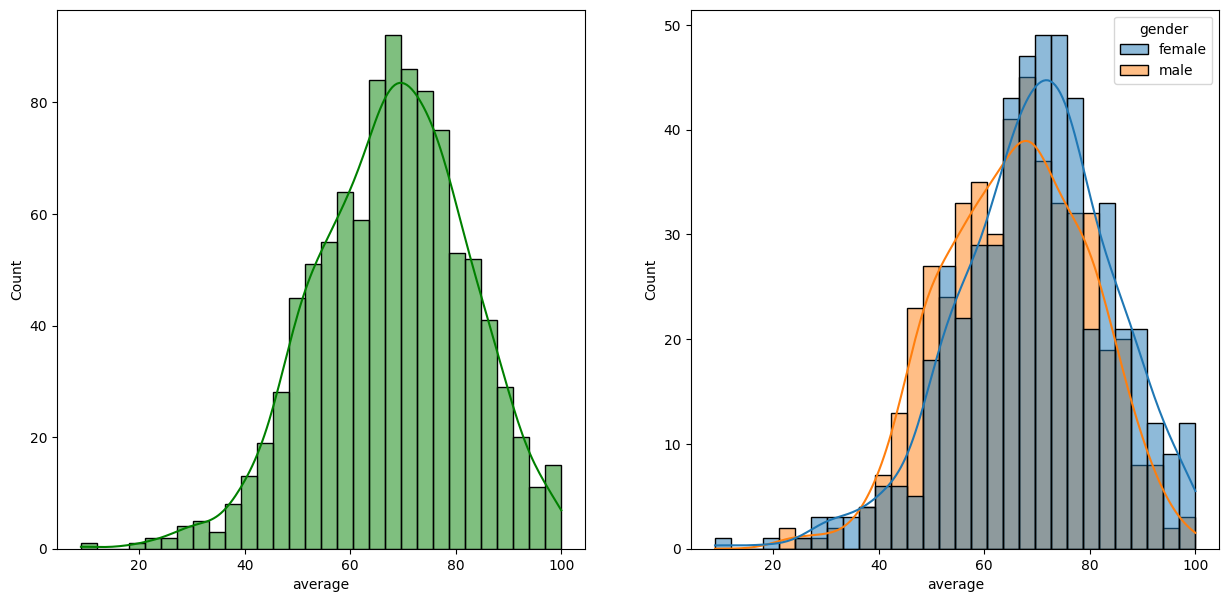

In [26]:
### Explore More Visualization
fig , axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,kde=True,color='g',bins=30,x='average')
plt.subplot(122)
sns.histplot(data=df,kde=True,color='g',bins=30,x='average',hue='gender')

# Insights
Female student tend to perform well than male students

<AxesSubplot:xlabel='average', ylabel='Count'>

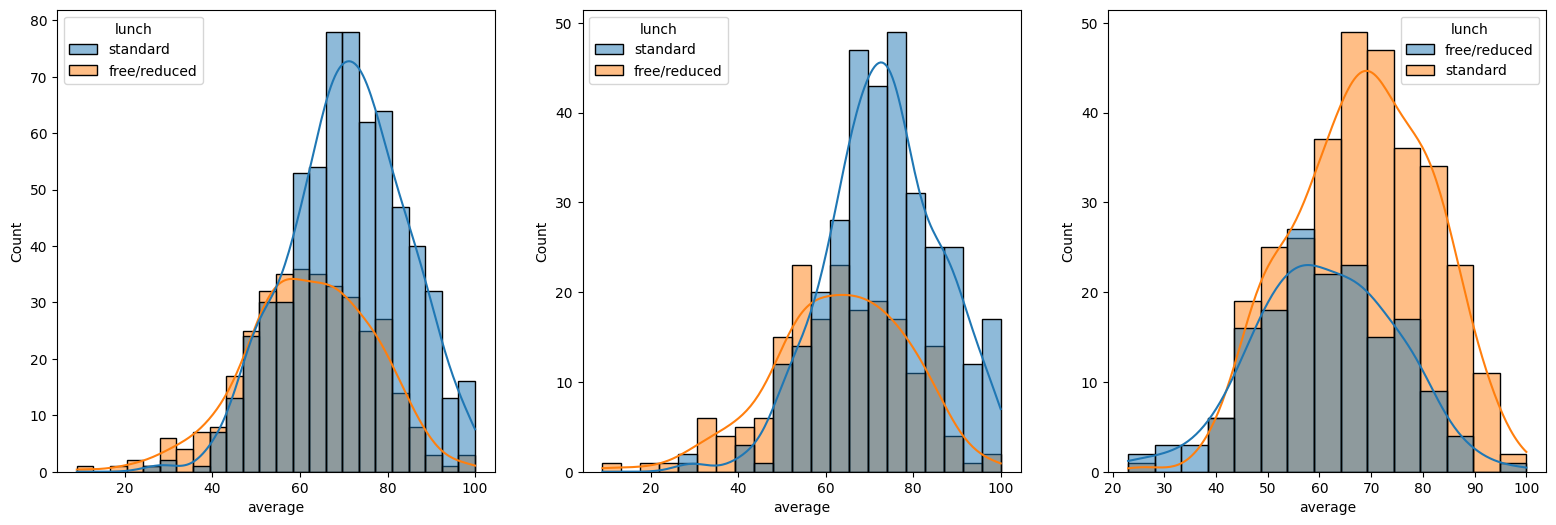

In [30]:
plt.subplots(1,3,figsize = (26,6))
plt.subplot(141)
sns.histplot(data=df,kde=True,color='g',x='average',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],kde=True,color='g',x='average',hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],kde=True,color='g',x='average',hue='lunch')

# Insights
Standard Lunch help students perform well in exams
Standard lunch helps perform well in exams be it a male or female

<AxesSubplot:xlabel='average', ylabel='Count'>

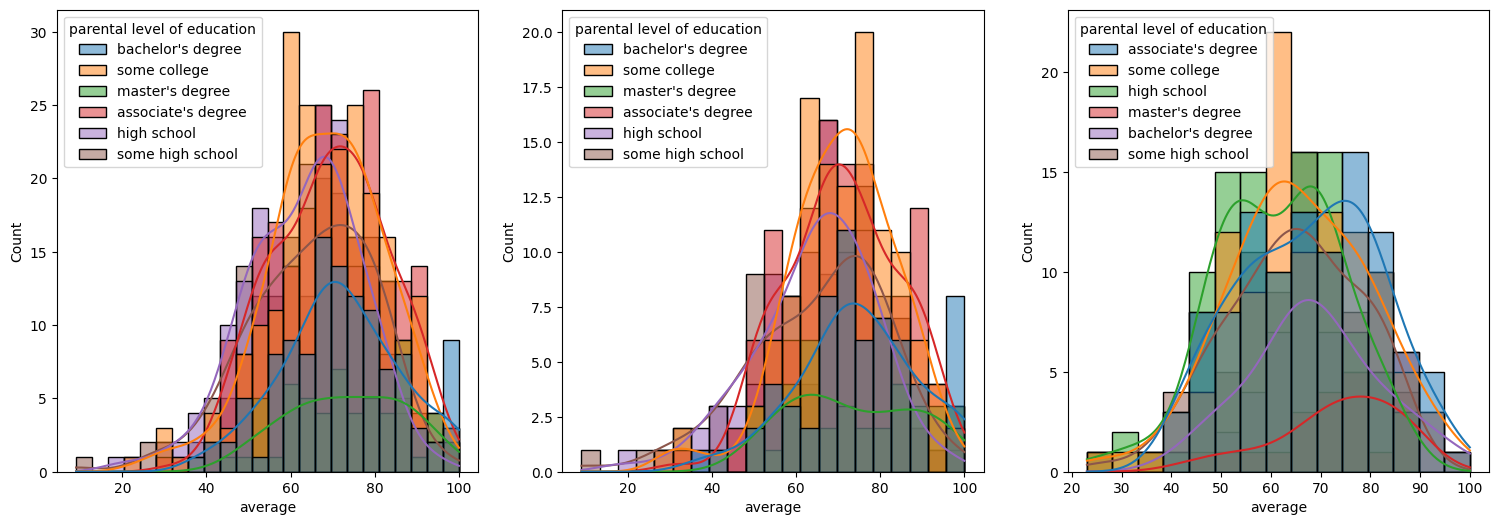

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

# Insights

---> In general parent's education don't help student perform well in exam.
---> 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
---> 2nd plot we can see there is no effect of parent's education on female students.

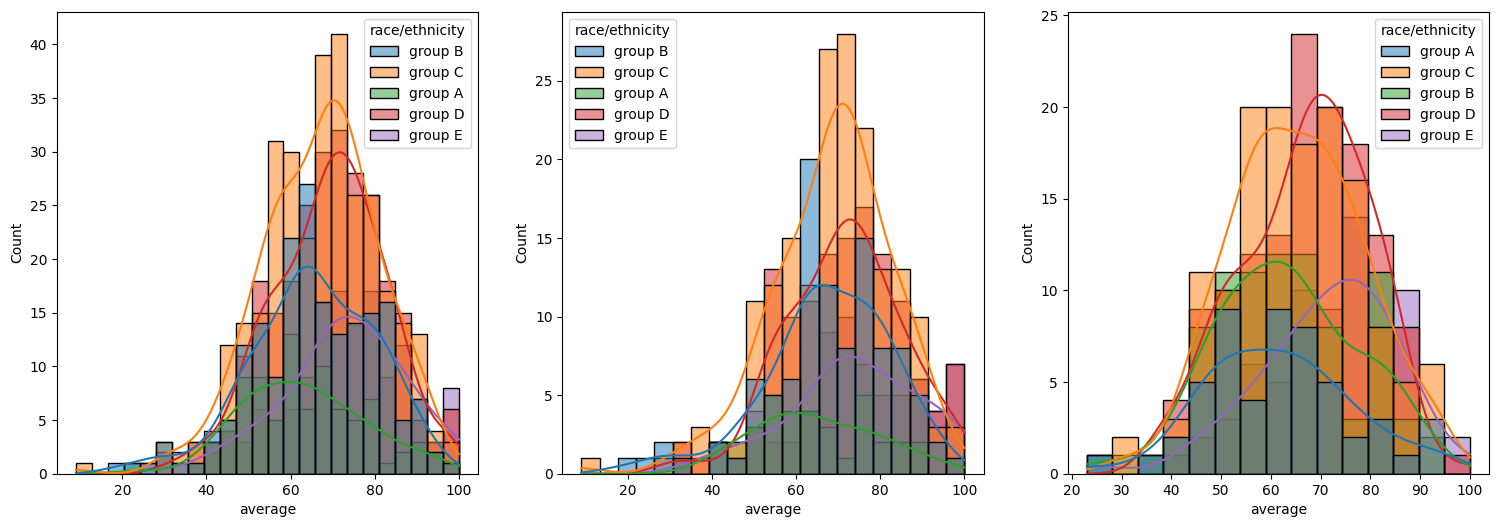

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

# Insights

--> Students of group A and group B tends to perform poorly in exam.
--> Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female